In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from functools import partialmethod
pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=7)

sns.set_palette('bright')
plt.rcParams['figure.figsize'] = 16,12

# ML Finhack EDA

In [128]:
df = pd.read_csv("finhack/train_LTFS.csv")
df.columns = map(lambda x : ''.join(x.replace('_', '.').split('.')), df.columns.str.title())

## Shape

In [129]:
rows, cols = df.shape
print(f"This dataset contains {rows} rows and {cols} columns")

This dataset contains 233154 rows and 41 columns


## Feature Description

* UniqueID - айдишник
* loandefault Payment default in the first EMI on due date disbursedamount Amount of Loan disbursed 
* asset_cost Cost of the Asset 
* ltv -  Loan to Value of the asset
* branchid-  Branch where the loan was disbursed 
* supplier_id -  Vehicle Dealer where the loan was disbursed 
* manufacturer_id - Vehicle manufacturer(Hero, Honda, TVS etc.) 
* Currentpincode - Current pincode of the customer 
* Date.of.Birth - Date of birth of the customer 
* Employment.Type - Employment Type of the customer (Salaried/Self Employed) 
* DisbursalDate - Date of disbursement 
* StateID State of disbursement 
* EmployeecodeID -  Employee of the organization who logged the disbursement 
* MobileNoAvlFlag - if Mobile no. was shared by the customer then flagged as 1 
* Aadharflag - if aadhar was shared by the customer then flagged as 1 
* PANflag - if pan was shared by the customer then flagged as 1 
* VoterIDflag -  if voter was shared by the customer then flagged as 1 
* Drivingflag - if DL was shared by the customer then flagged as 1 
* Passportflag  - if passport was shared by the customer then flagged as 1 
* PERFORMCNS.SCORE - Bureau Score 
* PERFORMCNS.SCORE.DESCRIPTION - Bureau score description 
* PRI.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement Primary accounts are those which the customer has taken for his personal use 
* PRI.ACTIVE.ACCTS -  count of active loans taken by the customer at the time of disbursement 
* PRI.OVERDUE.ACCTS - count of default accounts at the time of disbursement 
* PRI.CURRENT.BALANCE - total Principal outstanding amount of the active loans at the time of disbursement 
*  PRI.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement 
* PRI.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement 
* SEC.NO.OF.ACCTS - count of total loans taken by the customer at the time of disbursement Secondary accounts are those which the customer act as a co-applicant or gaurantor 
* SEC.ACTIVE.ACCTS - count of active loans taken by the customer at the time of disbursement 
* SEC.OVERDUE.ACCTS - count of default accounts at the time of disbursement 
* SEC.CURRENT.BALANCE - total Principal outstanding amount of the active loans at the time of disbursement 
* SEC.SANCTIONED.AMOUNT - total amount that was sanctioned for all the loans at the time of disbursement 
* SEC.DISBURSED.AMOUNT - total amount that was disbursed for all the loans at the time of disbursement 
* PRIMARY.INSTAL.AMT - EMI Amount of the primary loan 
* SEC.INSTAL.AMT - EMI Amount of the secondary loan 
* NEW.ACCTS.IN.LAST.SIX.MONTHS - New loans taken by the customer in last 6 months before the disbursment 
* DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS - Loans defaulted in the last 6 months 
* AVERAGE.ACCT.AGE - Average loan tenure 
* CREDIT.HISTORY.LENGTH - Time since first loan 
* NO.OFINQUIRIES - Enquries done by the customer for loans

## Target

In [130]:
target = 'LoanDefault'

In our task we try to predict whether our client will default or not

* 0 - will not default (will pay the loan)

* 1 - will default

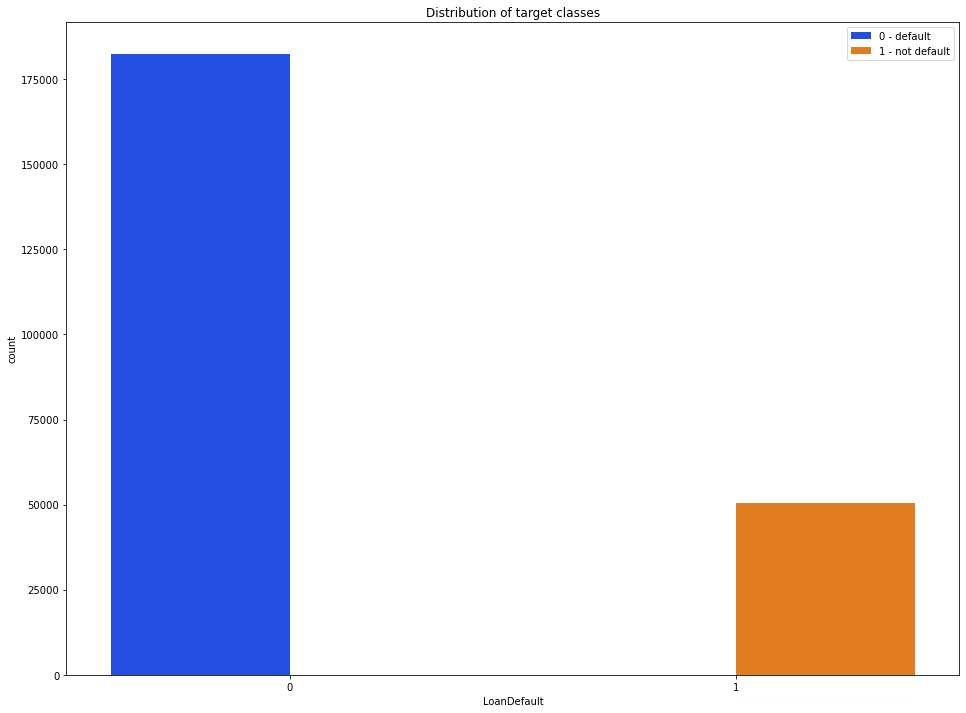

In [131]:
_ = sns.countplot(x = target, hue = target, data = df).set(title = 'Distribution of target classes')
_ = plt.legend(["0 - default", "1 - not default"])

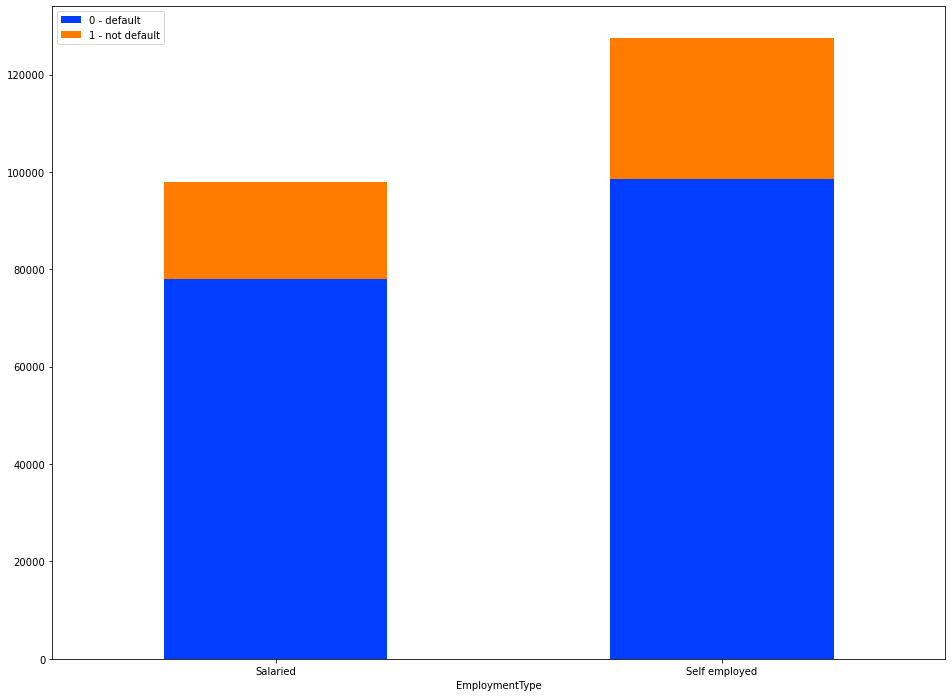

In [132]:
_ = pd.crosstab(df['EmploymentType'],df[target]).plot.bar(stacked=True)
_ = plt.legend(["0 - default", "1 - not default"])
_ = plt.xticks(rotation=0)

## Features

In [133]:
df.isna().sum().sort_values(ascending = False).head()

EmploymentType         7661
Uniqueid                  0
SecSanctionedAmount       0
PriOverdueAccts           0
PriCurrentBalance         0
dtype: int64

In [134]:
nans = df.isna().sum().sort_values(ascending = False).sum()
print(f"As we can see our dataset has only {nans} NaN values,",
     f"so we can just drop them because that's just {nans/len(df)*100:.2f}% of the initial \ndataset",
     "or we can try to regress it somehow on other attributes.")

As we can see our dataset has only 7661 NaN values, so we can just drop them because that's just 3.29% of the initial 
dataset or we can try to regress it somehow on other attributes.


In [135]:
df = df.dropna()

In [136]:
cols = df.columns[:-1]
cols

Index(['Uniqueid', 'DisbursedAmount', 'AssetCost', 'Ltv', 'BranchId',
       'SupplierId', 'ManufacturerId', 'CurrentPincodeId', 'DateOfBirth',
       'EmploymentType', 'Disbursaldate', 'StateId', 'EmployeeCodeId',
       'MobilenoAvlFlag', 'AadharFlag', 'PanFlag', 'VoteridFlag',
       'DrivingFlag', 'PassportFlag', 'PerformCnsScore',
       'PerformCnsScoreDescription', 'PriNoOfAccts', 'PriActiveAccts',
       'PriOverdueAccts', 'PriCurrentBalance', 'PriSanctionedAmount',
       'PriDisbursedAmount', 'SecNoOfAccts', 'SecActiveAccts',
       'SecOverdueAccts', 'SecCurrentBalance', 'SecSanctionedAmount',
       'SecDisbursedAmount', 'PrimaryInstalAmt', 'SecInstalAmt',
       'NewAcctsInLastSixMonths', 'DelinquentAcctsInLastSixMonths',
       'AverageAcctAge', 'CreditHistoryLength', 'NoOfInquiries'],
      dtype='object')

Here is the list of cols which contain categorical features (IDs)

In [137]:
id_cols = ["Uniqueid", "SupplierId", "ManufacturerId", "BranchId", "CurrentPincodeId", 
          "StateId", "EmployeeCodeId"]

In [138]:
for col in id_cols:
    print(f"Column {col} has {df[col].nunique()}") 

Column Uniqueid has 225493
Column SupplierId has 2945
Column ManufacturerId has 11
Column BranchId has 82
Column CurrentPincodeId has 6659
Column StateId has 22
Column EmployeeCodeId has 3269


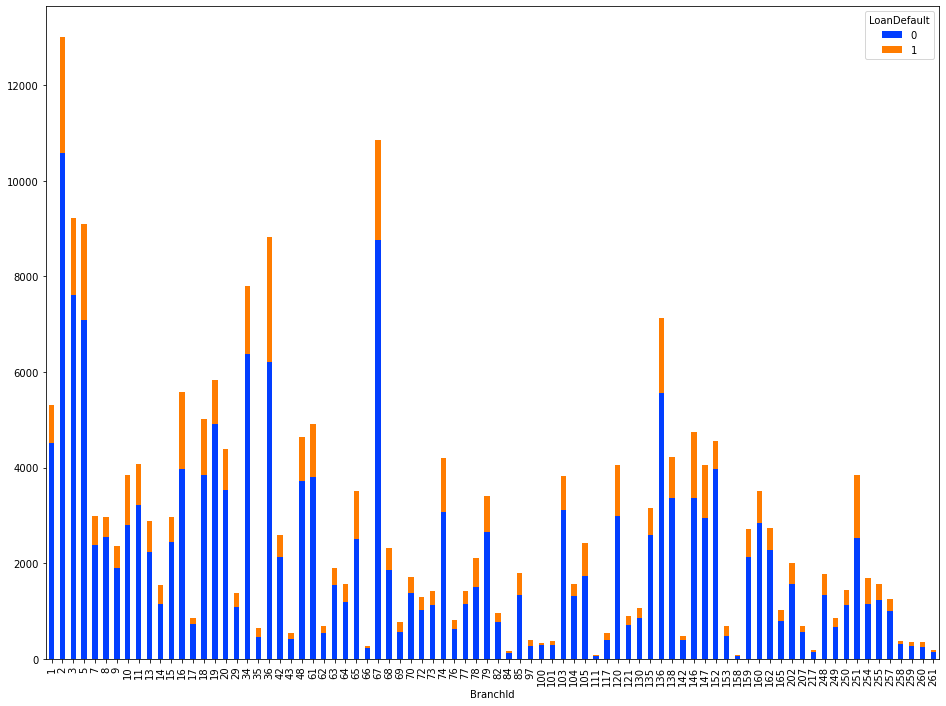

In [139]:
_ = pd.crosstab(df['BranchId'],df[target]).plot.bar(stacked=True)
_ = plt.xticks(rotation=90)

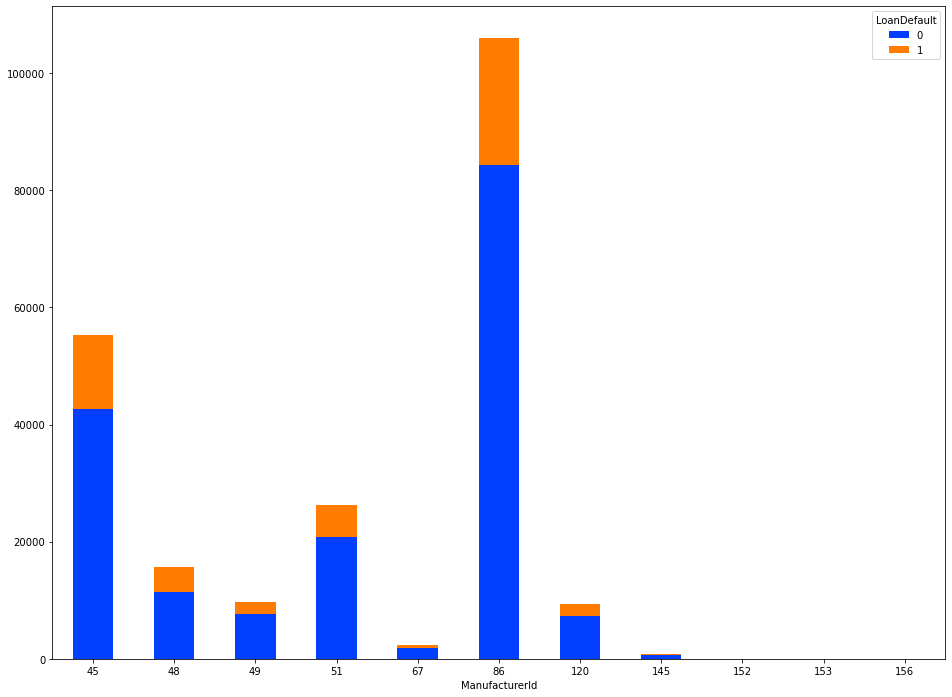

In [140]:
_ = pd.crosstab(df['ManufacturerId'],df[target]).plot.bar(stacked=True)
_ = plt.xticks(rotation=0)

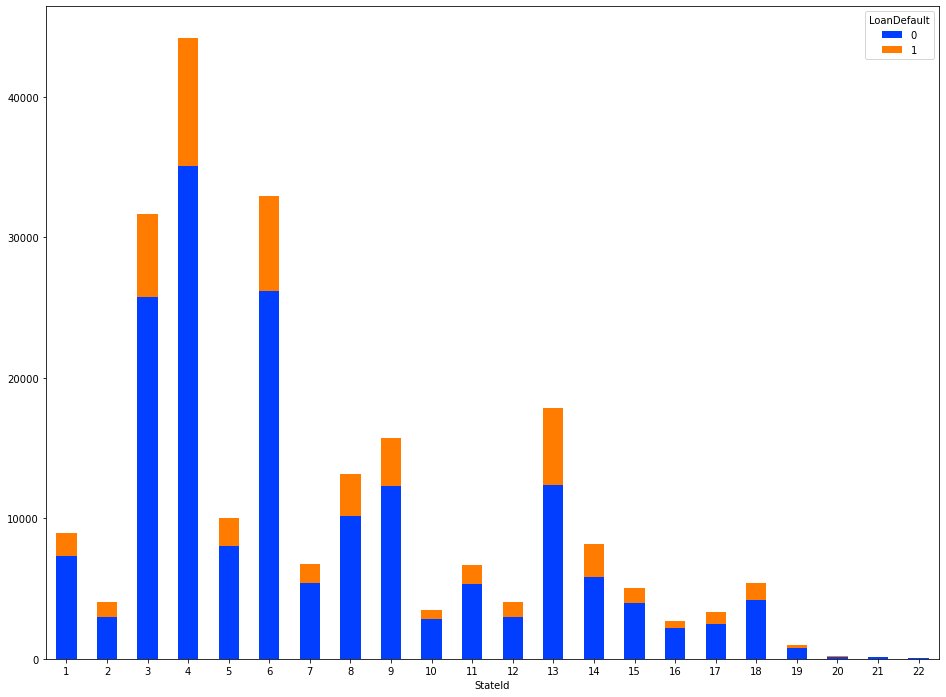

In [141]:
_ = pd.crosstab(df['StateId'],df[target]).plot.bar(stacked=True)
_ = plt.xticks(rotation=0)

I am not sure that it says a lot, but we can conclude that in states 3, 4, 6, 13 probability of fedaultt is noticeably higher.

In [142]:
cols

Index(['Uniqueid', 'DisbursedAmount', 'AssetCost', 'Ltv', 'BranchId',
       'SupplierId', 'ManufacturerId', 'CurrentPincodeId', 'DateOfBirth',
       'EmploymentType', 'Disbursaldate', 'StateId', 'EmployeeCodeId',
       'MobilenoAvlFlag', 'AadharFlag', 'PanFlag', 'VoteridFlag',
       'DrivingFlag', 'PassportFlag', 'PerformCnsScore',
       'PerformCnsScoreDescription', 'PriNoOfAccts', 'PriActiveAccts',
       'PriOverdueAccts', 'PriCurrentBalance', 'PriSanctionedAmount',
       'PriDisbursedAmount', 'SecNoOfAccts', 'SecActiveAccts',
       'SecOverdueAccts', 'SecCurrentBalance', 'SecSanctionedAmount',
       'SecDisbursedAmount', 'PrimaryInstalAmt', 'SecInstalAmt',
       'NewAcctsInLastSixMonths', 'DelinquentAcctsInLastSixMonths',
       'AverageAcctAge', 'CreditHistoryLength', 'NoOfInquiries'],
      dtype='object')

In [143]:
dummies = []
for col in cols:
    if df[col].nunique() == 2:
        print(f"{col} must be Dummy")
        dummies.append(col)

EmploymentType must be Dummy
AadharFlag must be Dummy
PanFlag must be Dummy
VoteridFlag must be Dummy
DrivingFlag must be Dummy
PassportFlag must be Dummy


In [144]:
cols = list(filter(lambda i: i not in id_cols+dummies, cols))
cols

['DisbursedAmount',
 'AssetCost',
 'Ltv',
 'DateOfBirth',
 'Disbursaldate',
 'MobilenoAvlFlag',
 'PerformCnsScore',
 'PerformCnsScoreDescription',
 'PriNoOfAccts',
 'PriActiveAccts',
 'PriOverdueAccts',
 'PriCurrentBalance',
 'PriSanctionedAmount',
 'PriDisbursedAmount',
 'SecNoOfAccts',
 'SecActiveAccts',
 'SecOverdueAccts',
 'SecCurrentBalance',
 'SecSanctionedAmount',
 'SecDisbursedAmount',
 'PrimaryInstalAmt',
 'SecInstalAmt',
 'NewAcctsInLastSixMonths',
 'DelinquentAcctsInLastSixMonths',
 'AverageAcctAge',
 'CreditHistoryLength',
 'NoOfInquiries']

In [145]:
for col in cols:
    if df[col].nunique() < 5:
        print(f"Col {col} has not that many values : {df[col].nunique()}")

Col MobilenoAvlFlag has not that many values : 1


Some strange column with a single value, so lets drop it.

In [146]:
df = df.drop(columns=['MobilenoAvlFlag'])
cols.remove('MobilenoAvlFlag')

In [148]:
df['DateOfBirth']

0         01-01-84
1         31-07-85
2         24-08-85
3         30-12-93
4         09-12-77
            ...   
233149    01-08-88
233150    05-12-88
233151    01-06-76
233152    26-03-94
233153    18-02-84
Name: DateOfBirth, Length: 225493, dtype: object

Let's cast Date of birth from dd-mm-yy -> yy

In [149]:
df['DateOfBirth'] = df['DateOfBirth'].apply(lambda z : z[-2:])

In [150]:
df.columns

Index(['Uniqueid', 'DisbursedAmount', 'AssetCost', 'Ltv', 'BranchId',
       'SupplierId', 'ManufacturerId', 'CurrentPincodeId', 'DateOfBirth',
       'EmploymentType', 'Disbursaldate', 'StateId', 'EmployeeCodeId',
       'AadharFlag', 'PanFlag', 'VoteridFlag', 'DrivingFlag', 'PassportFlag',
       'PerformCnsScore', 'PerformCnsScoreDescription', 'PriNoOfAccts',
       'PriActiveAccts', 'PriOverdueAccts', 'PriCurrentBalance',
       'PriSanctionedAmount', 'PriDisbursedAmount', 'SecNoOfAccts',
       'SecActiveAccts', 'SecOverdueAccts', 'SecCurrentBalance',
       'SecSanctionedAmount', 'SecDisbursedAmount', 'PrimaryInstalAmt',
       'SecInstalAmt', 'NewAcctsInLastSixMonths',
       'DelinquentAcctsInLastSixMonths', 'AverageAcctAge',
       'CreditHistoryLength', 'NoOfInquiries', 'LoanDefault'],
      dtype='object')

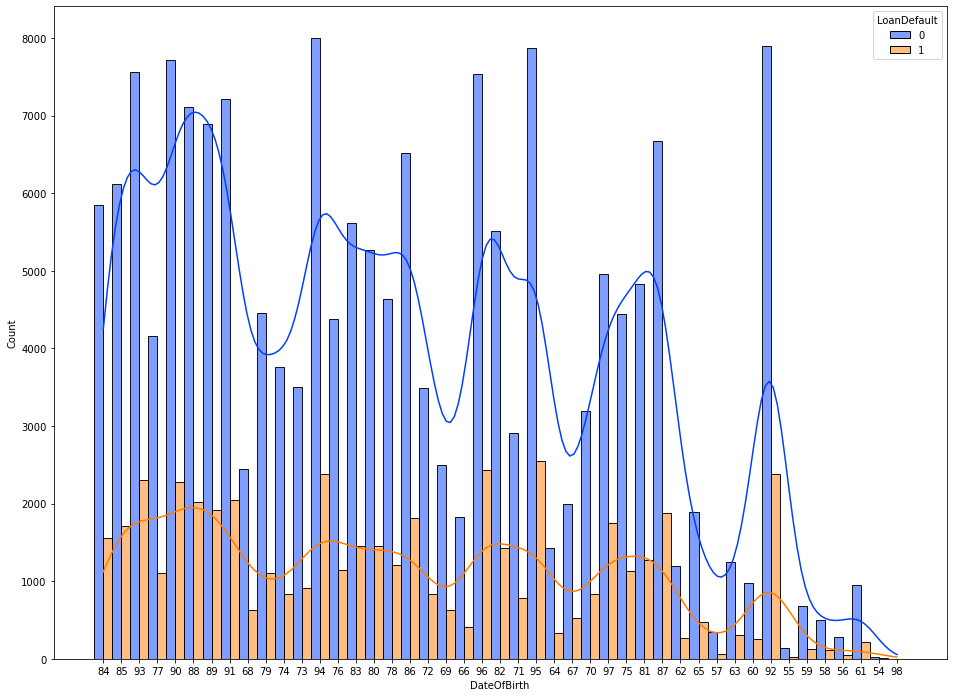

In [151]:
_ = sns.histplot(data = df, x = "DateOfBirth", hue = "LoanDefault", multiple="dodge", shrink=1, kde=True)

In [152]:
df['Ltv']

0         89.55
1         73.23
2         89.63
3         88.48
4         88.39
          ...  
233149    60.72
233150    74.95
233151    48.45
233152    49.10
233153    66.81
Name: Ltv, Length: 225493, dtype: float64

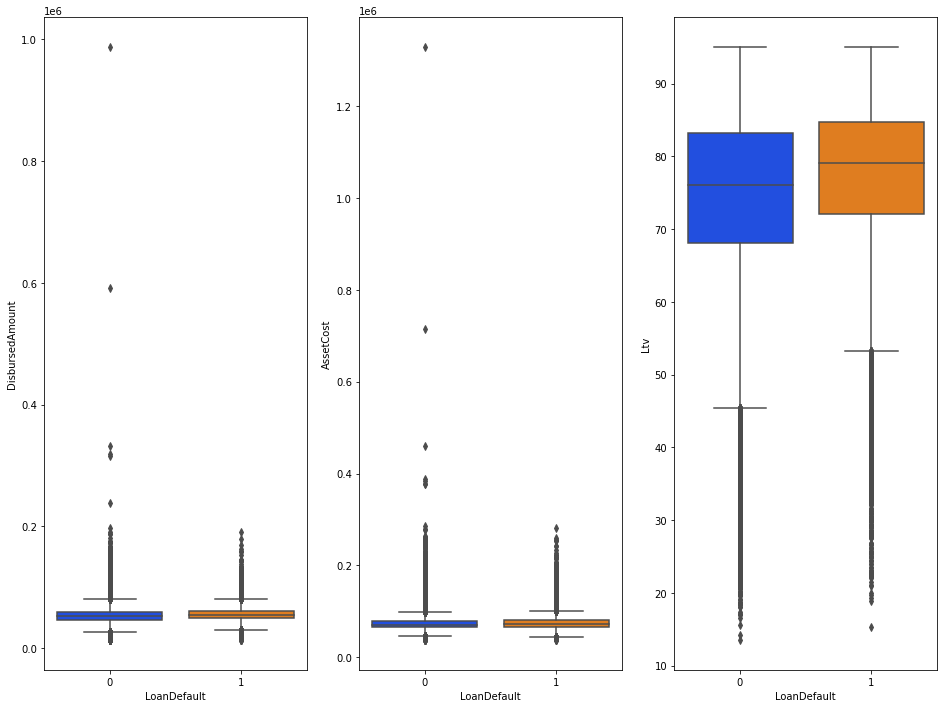

In [153]:
cols_numeric = ['DisbursedAmount','AssetCost','Ltv']

for ind, col in enumerate(cols_numeric):
    plt.subplot(1, len(cols_numeric), ind + 1)
    sns.boxplot(y = col, x = target, data = df)

Clear deviaions in 'disbursed_amount' and 'asset_cost', let's clear them out.

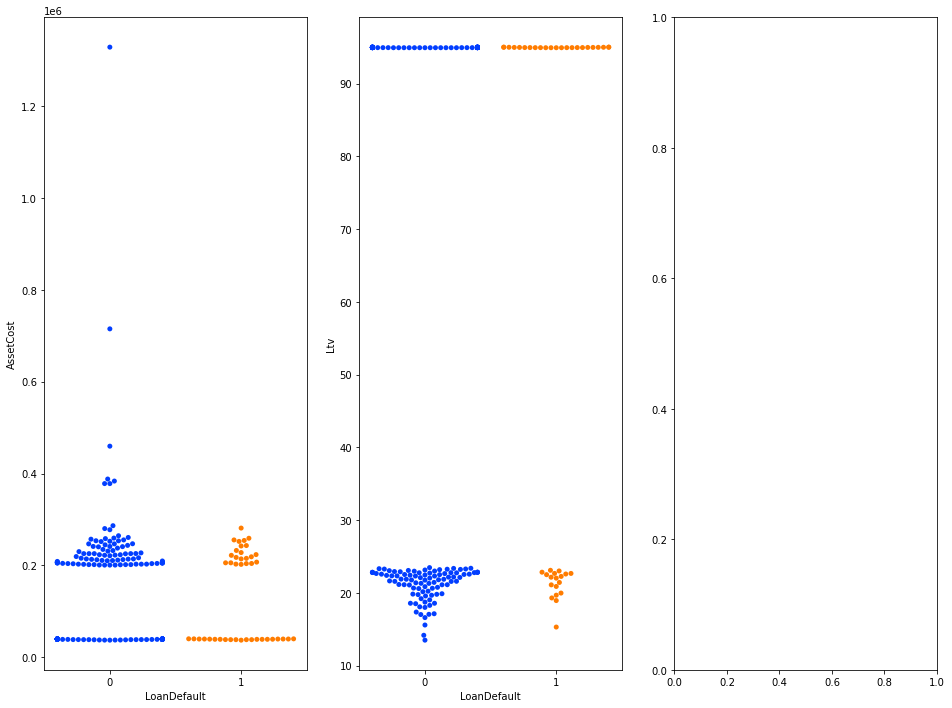

In [154]:
for ind, col in enumerate(cols_numeric):
    P = np.percentile(df[col], [0.05, 99.95])
    _ = sns.swarmplot(y = col, x = target, data = df[(df[col] < P[0]) | (df[col] > P[1])])
    plt.subplot(1, len(cols_numeric), ind + 1)

Here we take a look at the outliers, seems like there are no evident relations with target. (But if salary if 'asset_cost' is large enough (~400_000 USD and higher there are no defaults)

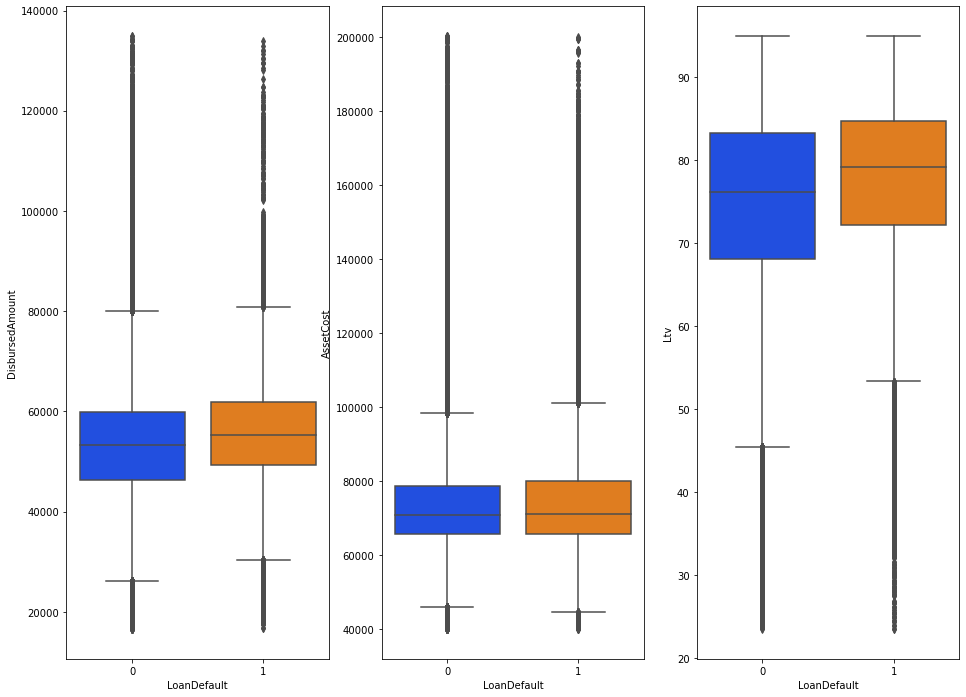

In [156]:
# if True:
#     for col in cols_numeric:
#         P = np.percentile(df[col], [0.05, 99.95])
#         df = df[(df[col] > P[0]) & (df[col] < P[1])]
for ind, col in enumerate(cols_numeric):
    lower, upper = np.percentile(df[col], [0.05, 99.95])
    plt.subplot(1, len(cols_numeric), ind + 1)
    _ = sns.boxplot(y = col, x = target, data = df[(df[col] > lower) & (df[col] < upper)])

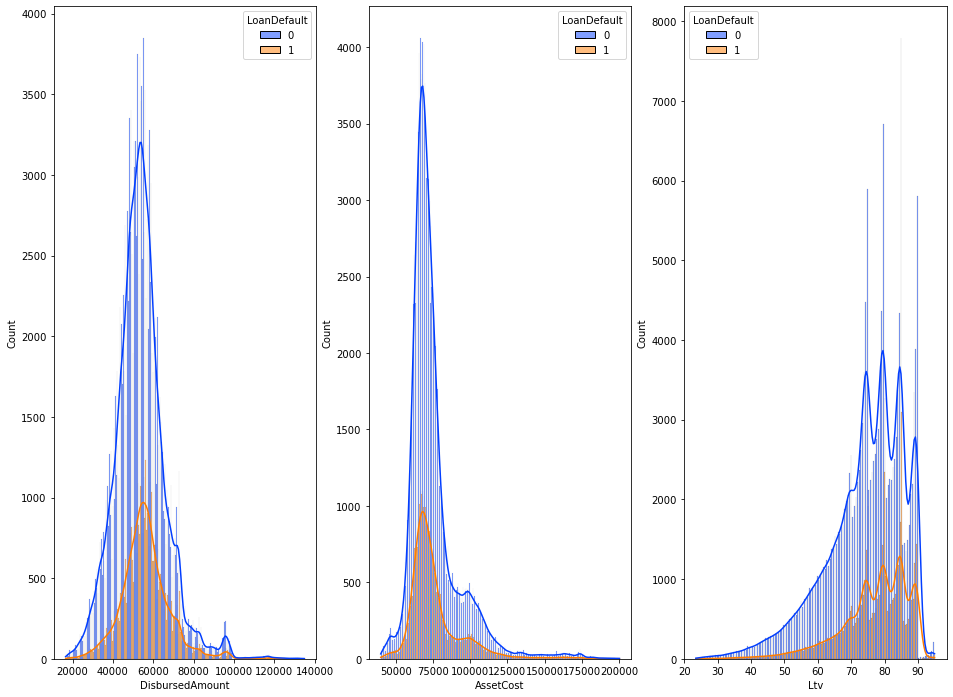

In [160]:
for ind, col in enumerate(cols_numeric):
    lower, upper = np.percentile(df[col], [0.05, 99.95])
    plt.subplot(1, len(cols_numeric), ind + 1)
    _ = sns.histplot(data = df[(df[col] > lower) & (df[col] < upper)], x = col, hue = "LoanDefault", multiple="dodge", shrink=1, kde=True)

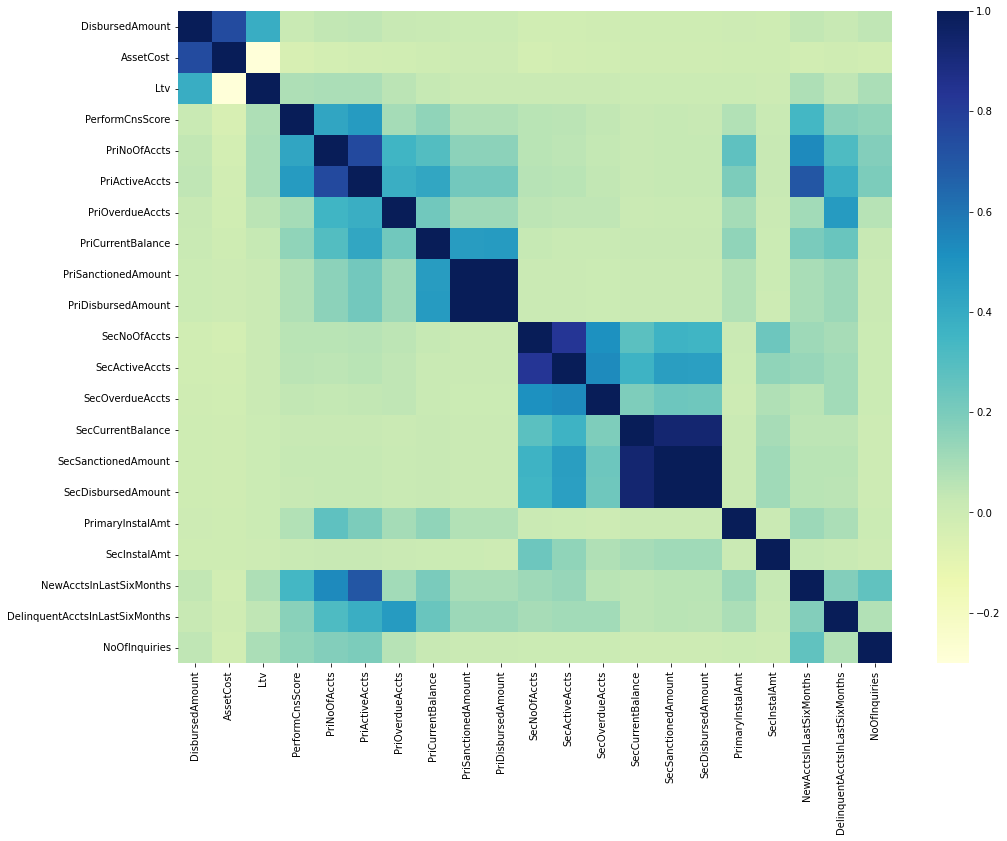

In [157]:
_ = sns.heatmap(df[cols].corr(), cmap = 'YlGnBu')

Overall, dataset seems not that bad. It has very few empty values with approximately normal distribution of features. Classes are balanced and no strong posi